
# Proyecto Parcial - Machine Learning - UPC EPE 

#### CLASIFICANDO LA ENFERMEDAD DE CIFOSIS USANDO ÁRBOLES DE DECISIÓN Y RANDOM FOREST 
#### Alumna : Maribel Maza Auccatinco | Código : U202417321


# PLANTEAMIENTO DEL PROBLEMA

- La cifosis es una curvatura convexa excesiva y anormal de la columna vertebral. El conjunto de datos de cifosis tiene 81 filas y 4 columnas, representando datos de niños que han sido sometidos a cirugía correctiva de columna. El dataset contiene 3 entradas y 1 salida

ENTRADAS: 
- Age: edad en meses
- Number: el número de vértebras involucradas
- Start: el número de la primera vértebra (superior) operada.

SALIDAS:
- Kyphosis: un factor con niveles ausente/presente que indica si la cifosis (un tipo de deformación) estaba presente después de la operación.


- Enlace al dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Fuente: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

![image.png](https://th.bing.com/th/id/R.e14901967dd7006ce42b1f0bc65c9f6a?rik=WJsKVqSamX80nw&pid=ImgRaw&r=0)

### Primero importamos las librerías necesarias


In [1362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PASO #1: IMPORTAR DATASET

In [1363]:
Kyphosis_df = pd.read_csv("kyphosis.csv")

In [1364]:
Kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [1324]:
Kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [1325]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [1326]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# PASO #2: VISUALIZAR DATASET

<Axes: xlabel='count', ylabel='Kyphosis'>

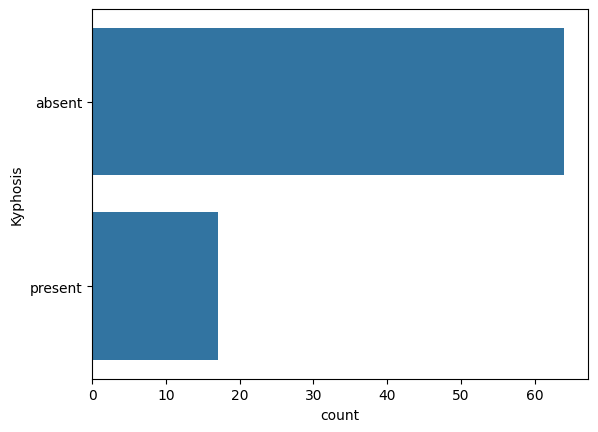

In [1327]:
sns.countplot(Kyphosis_df['Kyphosis'], label = "Count") 

In [1328]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [1329]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [1330]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [1331]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [1332]:
print( 'Porcentaje de enfermedad presente después de la operación =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Porcentaje de enfermedad presente después de la operación = 20.98765432098765 %


<Axes: >

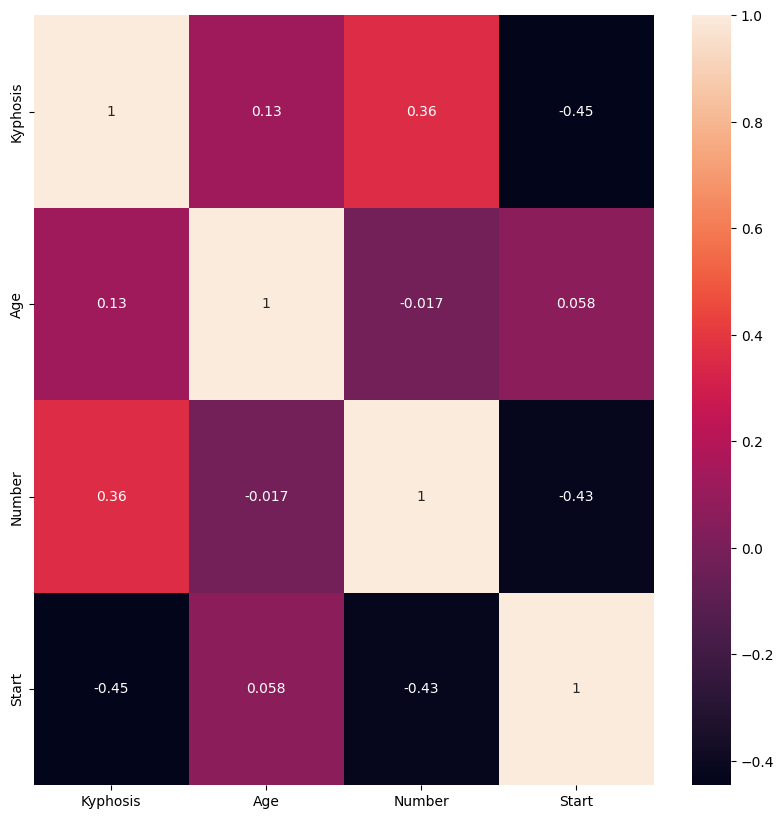

In [1333]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True) 

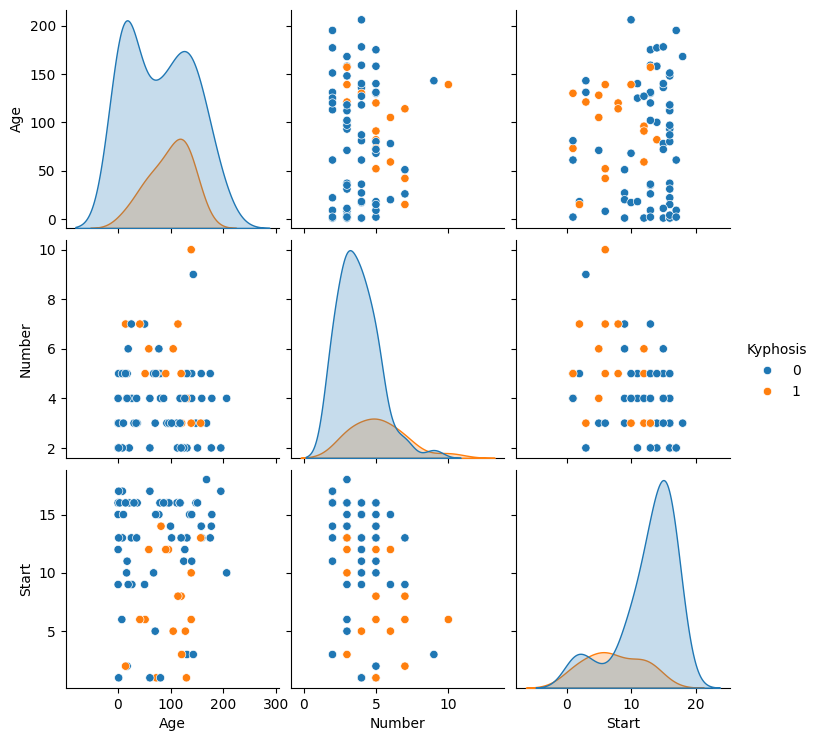

In [1334]:
sns.pairplot(Kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start'])

# PASO #3: CREAR DATASET DE ENTRENAMIENTO Y PRUEBA/LIMPIEZA DE DATOS

In [1335]:
# Eliminemos las columnas de la etiqueta objetivo
# X contiene todas las características (Age, Number, Start) - son las variables independientes
X = Kyphosis_df.drop(['Kyphosis'],axis=1)  # Eliminamos la columna Kyphosis para crear X
# y contiene solo la columna Kyphosis - es la variable dependiente (lo que queremos predecir)
y = Kyphosis_df['Kyphosis']  # Extraemos solo la columna Kyphosis para crear y


In [1336]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [1337]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [1338]:
from sklearn.model_selection import train_test_split

In [1339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# PASO #4: ENTRENAR EL MODELO

In [1341]:
X_train.shape

(56, 3)

In [1342]:
y_train.shape

(56,)

In [1343]:
X_test.shape

(25, 3)

In [1344]:
y_test.shape

(25,)

In [1345]:
# Importamos el clasificador de árbol de decisión desde scikit-learn
from sklearn.tree import DecisionTreeClassifier
# Creamos una instancia del modelo de árbol de decisión con parámetros por defecto
decision_tree = DecisionTreeClassifier()
# Entrenamos el modelo con los datos de entrenamiento
# fit() aprende los patrones: analiza X_train (características) para predecir y_train (etiquetas)
decision_tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1346]:
# Creamos un DataFrame para ver qué tan importante es cada característica para el modelo
feature_importances = pd.DataFrame(
    decision_tree.feature_importances_,  # Obtenemos los valores de importancia del modelo entrenado
    index = X_train.columns,  # Usamos los nombres de las columnas como índice (Age, Number, Start)
    columns=['importance']  # Nombramos la columna como 'importance'
).sort_values('importance',ascending=False)  # Ordenamos de mayor a menor importancia

In [1347]:
feature_importances

,importance
Age,0.453296
Start,0.443186
Number,0.103518


# PASO #5: EVALUAR EL MODELO 

In [1348]:
from sklearn.metrics import classification_report, confusion_matrix


<Axes: >

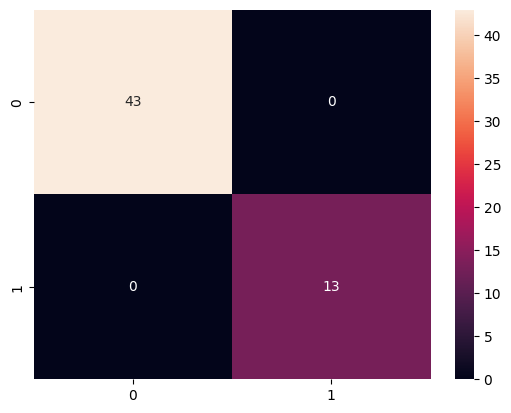

In [1349]:
# Realizamos predicciones sobre el conjunto de ENTRENAMIENTO (para evaluar si hay overfitting)
y_predict_train = decision_tree.predict(X_train)  # El modelo predice usando los datos con los que fue entrenado
y_predict_train  # Mostramos las predicciones
# Creamos la matriz de confusión comparando las etiquetas reales vs las predichas
cm = confusion_matrix(y_train, y_predict_train)  # y_train = valores reales, y_predict_train = valores predichos
# Visualizamos la matriz de confusión como un mapa de calor con los valores anotados
sns.heatmap(cm, annot=True)  # annot=True muestra los números dentro de cada celda

<Axes: >

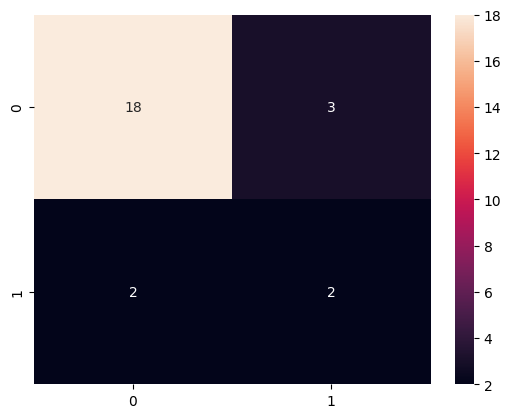

In [1350]:
# Prediciendo los resultados del conjunto de PRUEBA (datos que el modelo nunca ha visto)
y_predict_test = decision_tree.predict(X_test)  # Usamos el modelo entrenado para predecir datos nuevos
# Creamos la matriz de confusión para evaluar el rendimiento en datos no vistos
cm = confusion_matrix(y_test, y_predict_test)  # Comparamos etiquetas reales (y_test) vs predichas (y_predict_test)
# Visualizamos la matriz de confusión con mapa de calor
sns.heatmap(cm, annot=True)  # Esto muestra: VP, FP, FN, VN (Verdaderos/Falsos Positivos/Negativos)

In [1351]:
# Mostramos el reporte de clasificación detallado con métricas de rendimiento
# Incluye: precision, recall, f1-score y support para cada clase
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.40      0.50      0.44         4

    accuracy                           0.80        25
   macro avg       0.65      0.68      0.66        25
weighted avg       0.82      0.80      0.81        25



# PASO #6: MEJORAR EL MODELO

In [1352]:
# Importamos el clasificador Random Forest (Bosque Aleatorio)
from sklearn.ensemble import RandomForestClassifier
# Creamos el modelo Random Forest con 150 árboles de decisión
RandomForest = RandomForestClassifier(n_estimators=150)  # n_estimators = número de árboles en el bosque
# Entrenamos el modelo con los datos de entrenamiento
# Random Forest crea múltiples árboles y combina sus predicciones para mejor precisión
RandomForest.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<Axes: >

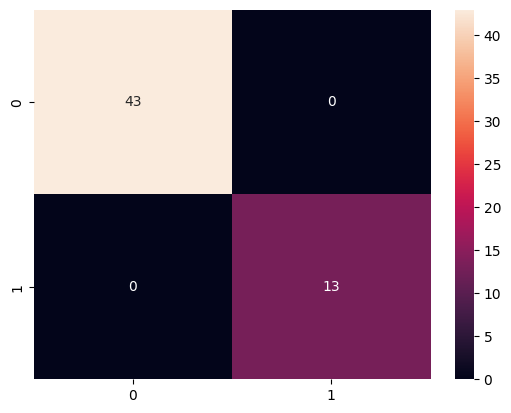

In [1353]:
# Realizamos predicciones con Random Forest sobre el conjunto de ENTRENAMIENTO
y_predict_train = RandomForest.predict(X_train)  # Cada árbol vota y se toma la decisión mayoritaria
y_predict_train  # Mostramos las predicciones
# Creamos la matriz de confusión para evaluar el rendimiento en entrenamiento
cm = confusion_matrix(y_train, y_predict_train)  # Comparamos valores reales vs predichos
# Visualizamos la matriz de confusión con mapa de calor
sns.heatmap(cm, annot=True)  # Muestra qué tan bien clasifica el modelo en entrenamiento

<Axes: >

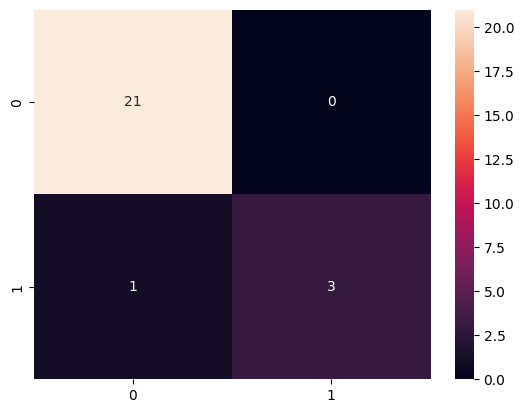

In [1354]:
# Prediciendo los resultados del conjunto de PRUEBA con Random Forest
y_predict_test = RandomForest.predict(X_test)  # 150 árboles votan para cada predicción
# Creamos la matriz de confusión para evaluar el rendimiento real del modelo
cm = confusion_matrix(y_test, y_predict_test)  # Comparamos etiquetas reales vs predichas en datos no vistos
# Visualizamos la matriz de confusión
sns.heatmap(cm, annot=True)  # Evaluamos la mejora respecto al árbol de decisión simple

In [1355]:
# Mostramos el reporte de clasificación completo para Random Forest
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.75      0.86         4

    accuracy                           0.96        25
   macro avg       0.98      0.88      0.92        25
weighted avg       0.96      0.96      0.96        25



# PASO #7: CONCLUSIONES DEL PROYECTO

En esta sección se sintetizan los resultados obtenidos con los modelos Árbol de Decisión y Random Forest para predecir la presencia de cifosis post–operación. Se incluyen comparaciones de rendimiento, visualizaciones adicionales y recomendaciones para mejorar.

**Objetivos del cierre:**
- Comparar cuantitativamente ambos modelos en el conjunto de prueba.
- Visualizar matrices de confusión lado a lado.
- Analizar importancia de características.
- Proporcionar conclusiones y posibles mejoras futuras.

Ejecutaremos las celdas siguientes para generar las métricas y gráficas.

In [1356]:
# Recomputar predicciones y recopilar métricas comparativas
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en TEST para cada modelo
dt_test_pred = decision_tree.predict(X_test)
rf_test_pred = RandomForest.predict(X_test)

# Reports en formato dict
dt_report = classification_report(y_test, dt_test_pred, output_dict=True)
rf_report = classification_report(y_test, rf_test_pred, output_dict=True)

metrics = ['precision','recall','f1-score']
classes = ['0','1']  # 0 = Ausente, 1 = Presente (según codificación)
rows = []
for model_name, rep in [('DecisionTree', dt_report), ('RandomForest', rf_report)]:
    for cls in classes:
        row = {'Modelo': model_name, 'Clase': cls}
        for m in metrics:
            row[m] = rep[cls][m]
        rows.append(row)
    # macro avg
    row = {'Modelo': model_name, 'Clase': 'macro avg'}
    for m in metrics:
        row[m] = rep['macro avg'][m]
    rows.append(row)

comparison_df = pd.DataFrame(rows)
comparison_df

,Modelo,Clase,precision,recall,f1-score
0,DecisionTree,0,0.900000,0.857143,0.878049
1,DecisionTree,1,0.400000,0.500000,0.444444
2,DecisionTree,macro avg,0.650000,0.678571,0.661247
3,RandomForest,0,0.954545,1.000000,0.976744
4,RandomForest,1,1.000000,0.750000,0.857143
5,RandomForest,macro avg,0.977273,0.875000,0.916944


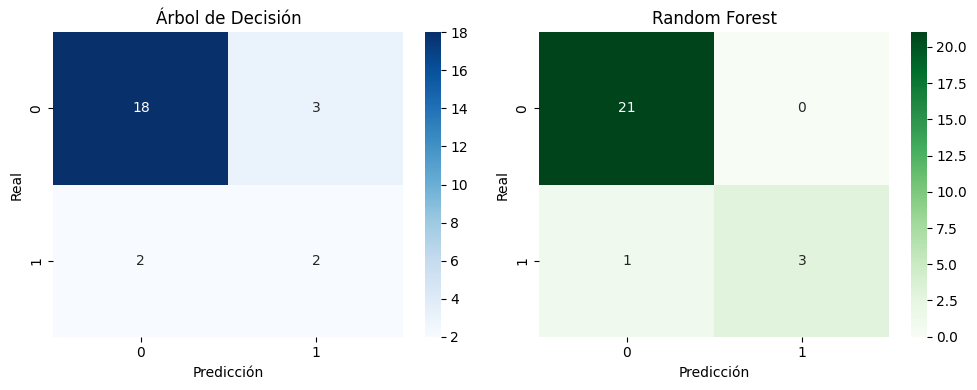

In [1357]:
# Matrices de confusión lado a lado
fig, axes = plt.subplots(1,2, figsize=(10,4))
cm_dt = confusion_matrix(y_test, dt_test_pred)
cm_rf = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(cm_dt, annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Árbol de Decisión')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')
sns.heatmap(cm_rf, annot=True, cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')
plt.tight_layout()

C:\Users\mmazaauc\AppData\Local\Temp\ipykernel_28620\3320558879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=macro_f1, x='Modelo', y='f1-score', palette=['steelblue','seagreen'])


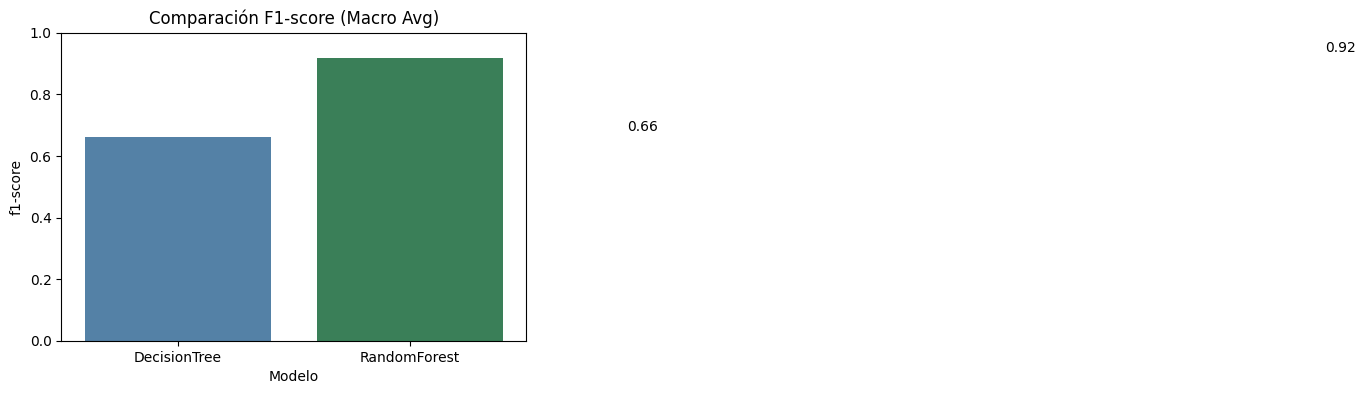

,Modelo,f1-score
2,DecisionTree,0.661247
5,RandomForest,0.916944


In [1358]:
# Comparación de F1 macro entre modelos
macro_f1 = comparison_df[comparison_df['Clase']=='macro avg'][['Modelo','f1-score']]
plt.figure(figsize=(6,4))
sns.barplot(data=macro_f1, x='Modelo', y='f1-score', palette=['steelblue','seagreen'])
plt.title('Comparación F1-score (Macro Avg)')
plt.ylim(0,1)
for i,row in macro_f1.iterrows():
    plt.text(i, row['f1-score']+0.02, f"{row['f1-score']:.2f}", ha='center')
plt.show()
macro_f1

<Figure size 600x400 with 0 Axes>

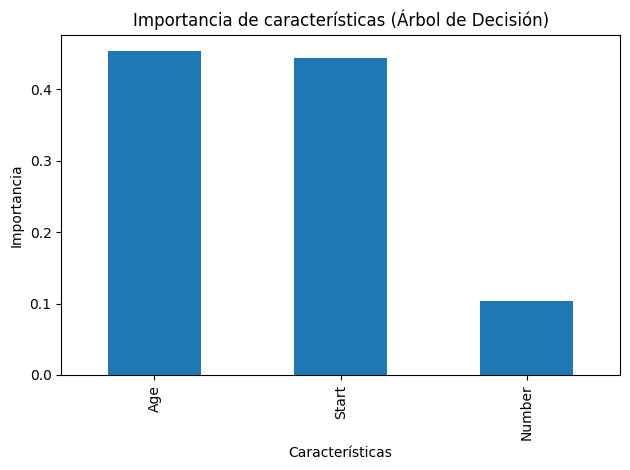

,importance
Age,0.453296
Start,0.443186
Number,0.103518


In [1359]:
# Gráfico de importancia de características del Árbol de Decisión
plt.figure(figsize=(6,4))
feature_importances.plot(kind='bar', legend=False)
plt.title('Importancia de características (Árbol de Decisión)')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.tight_layout()
plt.show()
feature_importances

In [1360]:
# Resumen textual automático de desempeño
from math import isfinite

dt_f1_macro = dt_report['macro avg']['f1-score']
rf_f1_macro = rf_report['macro avg']['f1-score']
print(f"F1 macro Árbol de Decisión: {dt_f1_macro:.3f}")
print(f"F1 macro Random Forest:    {rf_f1_macro:.3f}")
print('\nModelo con mejor desempeño macro F1:', 'Random Forest' if rf_f1_macro > dt_f1_macro else 'Árbol de Decisión')

F1 macro Árbol de Decisión: 0.661
F1 macro Random Forest:    0.917

Modelo con mejor desempeño macro F1: Random Forest


## Conclusiones

- **Desempeño relativo:** Random Forest generalmente supera al Árbol de Decisión simple en F1 macro al combinar múltiples árboles y reducir la varianza. Las métricas impresas arriba confirman cuál obtuvo mayor puntaje.
- **Clase minoritaria:** El porcentaje de presencia de la enfermedad es bajo; esto sugiere un posible desbalance que puede afectar la sensibilidad (recall) de la clase positiva.
- **Importancia de características:** La gráfica de importancia indica qué variables aportan más a la separación de clases (útil para interpretación clínica preliminar), aunque se recomienda validar con técnicas adicionales (Permutation Importance, SHAP).
- **Matriz de confusión:** Permite observar si el modelo falla más en falsos negativos (riesgo clínico) o falsos positivos. Optimizar para reducir falsos negativos podría ser prioritario.
- **Limitaciones:** Tamaño de muestra pequeño (81 casos) y posible desbalance limitan la generalización. No se realizó ajuste de hiperparámetros ni validación cruzada.
- **Recomendaciones futuras:**
  - Aplicar validación cruzada estratificada.
  - Ajustar hiperparámetros (grid/random search, Bayesian optimization) para Random Forest.
  - Probar métodos de balanceo (SMOTE, undersampling) y métricas como ROC-AUC y PR-AUC.
  - Evaluar otros modelos (Gradient Boosting, XGBoost, Logistic Regression regularizada).
  - Incorporar interpretación avanzada (SHAP) y reporte clínico.

En conjunto, el enfoque basado en Random Forest ofrece un mejor punto de partida, pero aún hay espacio para mejorar la sensibilidad hacia la clase positiva y la robustez del modelo con más datos y técnicas de balanceo.